# Function estimation using neural network
### Test underfitting and Overfitting ... 
####  CS5242, 2022/23-2

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot
import math as m
import random as r

In [2]:
# define the function: noisy sine signal, 1d, defined between -10 and 10, step is 0.1

x = np.arange(-10,10,0.1)
#noisy version
y = asarray([ 2.5*m.sin(0.4*m.pi*i + 1.12) + 1.3*m.sin(0.17*m.pi*i + 3.1) + 2*r.random()   for i in x ])
#noise-less version
#y = asarray([ 2.5*m.sin(0.4*m.pi*i + 1.12) + 1.3*m.sin(0.17*m.pi*i + 3.1)  for i in x ])

print('min and max=' , x.min(), x.max(), y.min(), y.max())
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))


min and max= -10.0 9.899999999999928 -3.1621199376264286 4.8484625867621265


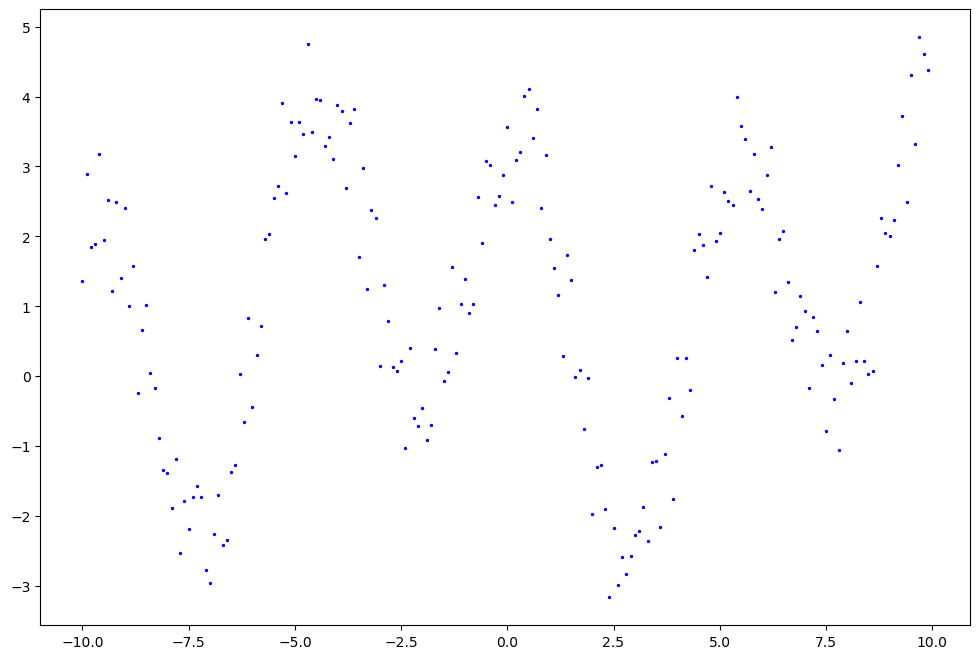

In [3]:
# plot the function y=F(x)
#pyplot.plot(x, y, color='blue', marker='o', linewidth=1, markersize=2)
pyplot.figure(figsize= (12,8))
pyplot.scatter(x, y, c='blue', s=2)

#### our ANN has got a 1xh1xh2xh3xh4x1 structure, with 4 hidden layers, a fully connected MLP
## Things to do:
### Underfititng: 1x15x15x1 , epochs~=20,
### to keep it good we go for: 1x5x15x5x15x1 , epochs~=2000, 
### to make an overfitting we go for: 1x50x50x50x50x1 , epochs ~= 30000
#### Set, Train, Evaluate, and see the results

In [4]:
# design the neural network model
model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu' , kernel_initializer='he_uniform'))
model.add(Dense(15, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(15, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')
# ft the model on the training dataset
model.fit(x, y, epochs=2000, batch_size=10, verbose=1, shuffle=True)
# make predictions for the input data
yhat = model.predict(x)


Epoch 1/2000
20/20 [==============================] - 0s 1ms/step - loss: 17.8364
Epoch 2/2000
20/20 [==============================] - 0s 1000us/step - loss: 6.6000
Epoch 3/2000
20/20 [==============================] - 0s 947us/step - loss: 4.2847
Epoch 4/2000
20/20 [==============================] - 0s 906us/step - loss: 3.9963
Epoch 5/2000
20/20 [==============================] - 0s 789us/step - loss: 4.0144
Epoch 6/2000
20/20 [==============================] - 0s 790us/step - loss: 3.9493
Epoch 7/2000
20/20 [==============================] - 0s 894us/step - loss: 3.9434
Epoch 8/2000
20/20 [==============================] - 0s 947us/step - loss: 3.9105
Epoch 9/2000
20/20 [==============================] - 0s 789us/step - loss: 3.8943
Epoch 10/2000
20/20 [==============================] - 0s 895us/step - loss: 3.8820
Epoch 11/2000
20/20 [==============================] - 0s 947us/step - loss: 3.8576
Epoch 12/2000
20/20 [==============================] - 0s 789us/step - loss: 3.7930
E

20/20 [==============================] - 0s 790us/step - loss: 2.7637
Epoch 100/2000
20/20 [==============================] - 0s 1ms/step - loss: 2.7103
Epoch 101/2000
20/20 [==============================] - 0s 895us/step - loss: 2.7630
Epoch 102/2000
20/20 [==============================] - 0s 789us/step - loss: 2.6972
Epoch 103/2000
20/20 [==============================] - 0s 895us/step - loss: 2.7018
Epoch 104/2000
20/20 [==============================] - 0s 1ms/step - loss: 2.7062
Epoch 105/2000
20/20 [==============================] - 0s 946us/step - loss: 2.7107
Epoch 106/2000
20/20 [==============================] - 0s 947us/step - loss: 2.7330
Epoch 107/2000
20/20 [==============================] - 0s 947us/step - loss: 2.7958
Epoch 108/2000
20/20 [==============================] - 0s 842us/step - loss: 2.6364
Epoch 109/2000
20/20 [==============================] - 0s 944us/step - loss: 2.7611
Epoch 110/2000
20/20 [==============================] - 0s 1000us/step - loss: 2.874

20/20 [==============================] - 0s 842us/step - loss: 2.3560
Epoch 196/2000
20/20 [==============================] - 0s 895us/step - loss: 2.6325
Epoch 197/2000
20/20 [==============================] - 0s 894us/step - loss: 2.4383
Epoch 198/2000
20/20 [==============================] - 0s 895us/step - loss: 2.4055
Epoch 199/2000
20/20 [==============================] - 0s 842us/step - loss: 2.3649
Epoch 200/2000
20/20 [==============================] - 0s 789us/step - loss: 2.3484
Epoch 201/2000
20/20 [==============================] - 0s 788us/step - loss: 2.3429
Epoch 202/2000
20/20 [==============================] - 0s 789us/step - loss: 2.4073
Epoch 203/2000
20/20 [==============================] - 0s 789us/step - loss: 2.3175
Epoch 204/2000
20/20 [==============================] - 0s 947us/step - loss: 2.3289
Epoch 205/2000
20/20 [==============================] - 0s 789us/step - loss: 2.4636
Epoch 206/2000
20/20 [==============================] - 0s 789us/step - loss: 2.

20/20 [==============================] - 0s 789us/step - loss: 2.1936
Epoch 292/2000
20/20 [==============================] - 0s 842us/step - loss: 2.3275
Epoch 293/2000
20/20 [==============================] - 0s 895us/step - loss: 2.1524
Epoch 294/2000
20/20 [==============================] - 0s 842us/step - loss: 2.2969
Epoch 295/2000
20/20 [==============================] - 0s 895us/step - loss: 2.2238
Epoch 296/2000
20/20 [==============================] - 0s 947us/step - loss: 2.4385
Epoch 297/2000
20/20 [==============================] - 0s 1ms/step - loss: 2.2635
Epoch 298/2000
20/20 [==============================] - 0s 1ms/step - loss: 2.1935
Epoch 299/2000
20/20 [==============================] - 0s 895us/step - loss: 2.2046
Epoch 300/2000
20/20 [==============================] - 0s 842us/step - loss: 2.2249
Epoch 301/2000
20/20 [==============================] - 0s 842us/step - loss: 2.1842
Epoch 302/2000
20/20 [==============================] - 0s 842us/step - loss: 2.3052

Epoch 388/2000
20/20 [==============================] - 0s 789us/step - loss: 2.0415
Epoch 389/2000
20/20 [==============================] - 0s 842us/step - loss: 2.0135
Epoch 390/2000
20/20 [==============================] - 0s 842us/step - loss: 2.0904
Epoch 391/2000
20/20 [==============================] - 0s 895us/step - loss: 2.0213
Epoch 392/2000
20/20 [==============================] - 0s 1ms/step - loss: 2.0273
Epoch 393/2000
20/20 [==============================] - 0s 895us/step - loss: 2.0703
Epoch 394/2000
20/20 [==============================] - 0s 999us/step - loss: 2.0316
Epoch 395/2000
20/20 [==============================] - 0s 843us/step - loss: 2.0233
Epoch 396/2000
20/20 [==============================] - 0s 947us/step - loss: 2.2159
Epoch 397/2000
20/20 [==============================] - 0s 895us/step - loss: 2.0627
Epoch 398/2000
20/20 [==============================] - 0s 842us/step - loss: 2.0192
Epoch 399/2000
20/20 [==============================] - 0s 790us/st

20/20 [==============================] - 0s 2ms/step - loss: 1.8834
Epoch 485/2000
20/20 [==============================] - 0s 2ms/step - loss: 1.8323
Epoch 486/2000
20/20 [==============================] - 0s 842us/step - loss: 1.7802
Epoch 487/2000
20/20 [==============================] - 0s 894us/step - loss: 1.7642
Epoch 488/2000
20/20 [==============================] - 0s 895us/step - loss: 1.7524
Epoch 489/2000
20/20 [==============================] - 0s 789us/step - loss: 1.7742
Epoch 490/2000
20/20 [==============================] - 0s 842us/step - loss: 1.7652
Epoch 491/2000
20/20 [==============================] - 0s 842us/step - loss: 1.8494
Epoch 492/2000
20/20 [==============================] - 0s 946us/step - loss: 1.7291
Epoch 493/2000
20/20 [==============================] - 0s 843us/step - loss: 1.7710
Epoch 494/2000
20/20 [==============================] - 0s 894us/step - loss: 1.7839
Epoch 495/2000
20/20 [==============================] - 0s 842us/step - loss: 1.8076

20/20 [==============================] - 0s 2ms/step - loss: 1.4769
Epoch 581/2000
20/20 [==============================] - 0s 895us/step - loss: 1.5984
Epoch 582/2000
20/20 [==============================] - 0s 1ms/step - loss: 1.4926
Epoch 583/2000
20/20 [==============================] - 0s 1000us/step - loss: 1.5617
Epoch 584/2000
20/20 [==============================] - 0s 895us/step - loss: 1.3970
Epoch 585/2000
20/20 [==============================] - 0s 842us/step - loss: 1.3847
Epoch 586/2000
20/20 [==============================] - 0s 948us/step - loss: 1.3324
Epoch 587/2000
20/20 [==============================] - 0s 842us/step - loss: 1.3941
Epoch 588/2000
20/20 [==============================] - 0s 842us/step - loss: 1.3305
Epoch 589/2000
20/20 [==============================] - 0s 895us/step - loss: 1.5151
Epoch 590/2000
20/20 [==============================] - 0s 895us/step - loss: 1.5273
Epoch 591/2000
20/20 [==============================] - 0s 895us/step - loss: 1.373

20/20 [==============================] - 0s 790us/step - loss: 0.9824
Epoch 677/2000
20/20 [==============================] - 0s 790us/step - loss: 1.0110
Epoch 678/2000
20/20 [==============================] - 0s 790us/step - loss: 0.9780
Epoch 679/2000
20/20 [==============================] - 0s 895us/step - loss: 0.9566
Epoch 680/2000
20/20 [==============================] - 0s 789us/step - loss: 1.0145
Epoch 681/2000
20/20 [==============================] - 0s 790us/step - loss: 1.0525
Epoch 682/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.9659
Epoch 683/2000
20/20 [==============================] - 0s 842us/step - loss: 0.9103
Epoch 684/2000
20/20 [==============================] - 0s 789us/step - loss: 0.9710
Epoch 685/2000
20/20 [==============================] - 0s 789us/step - loss: 1.0299
Epoch 686/2000
20/20 [==============================] - 0s 789us/step - loss: 0.9180
Epoch 687/2000
20/20 [==============================] - 0s 789us/step - loss: 1.00

20/20 [==============================] - 0s 842us/step - loss: 0.6857
Epoch 773/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.6945
Epoch 774/2000
20/20 [==============================] - 0s 895us/step - loss: 0.7485
Epoch 775/2000
20/20 [==============================] - 0s 947us/step - loss: 0.7091
Epoch 776/2000
20/20 [==============================] - 0s 842us/step - loss: 0.7203
Epoch 777/2000
20/20 [==============================] - 0s 895us/step - loss: 0.7173
Epoch 778/2000
20/20 [==============================] - 0s 947us/step - loss: 0.6898
Epoch 779/2000
20/20 [==============================] - 0s 895us/step - loss: 0.6921
Epoch 780/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.7103
Epoch 781/2000
20/20 [==============================] - 0s 947us/step - loss: 0.6513
Epoch 782/2000
20/20 [==============================] - 0s 947us/step - loss: 0.7274
Epoch 783/2000
20/20 [==============================] - 0s 895us/step - loss: 0.7452

20/20 [==============================] - 0s 2ms/step - loss: 0.6470
Epoch 869/2000
20/20 [==============================] - 0s 948us/step - loss: 0.6585
Epoch 870/2000
20/20 [==============================] - 0s 947us/step - loss: 0.5976
Epoch 871/2000
20/20 [==============================] - 0s 895us/step - loss: 0.6006
Epoch 872/2000
20/20 [==============================] - 0s 737us/step - loss: 0.5786
Epoch 873/2000
20/20 [==============================] - 0s 842us/step - loss: 0.5954
Epoch 874/2000
20/20 [==============================] - 0s 789us/step - loss: 0.5857
Epoch 875/2000
20/20 [==============================] - 0s 842us/step - loss: 0.5462
Epoch 876/2000
20/20 [==============================] - 0s 947us/step - loss: 0.5752
Epoch 877/2000
20/20 [==============================] - 0s 737us/step - loss: 0.6045
Epoch 878/2000
20/20 [==============================] - 0s 842us/step - loss: 0.5506
Epoch 879/2000
20/20 [==============================] - 0s 895us/step - loss: 0.54

20/20 [==============================] - 0s 2ms/step - loss: 0.4700
Epoch 965/2000
20/20 [==============================] - 0s 947us/step - loss: 0.4914
Epoch 966/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4799
Epoch 967/2000
20/20 [==============================] - 0s 947us/step - loss: 0.4946
Epoch 968/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.5348
Epoch 969/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4984
Epoch 970/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.5138
Epoch 971/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4826
Epoch 972/2000
20/20 [==============================] - 0s 895us/step - loss: 0.5632
Epoch 973/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4899
Epoch 974/2000
20/20 [==============================] - 0s 947us/step - loss: 0.5562
Epoch 975/2000
20/20 [==============================] - 0s 895us/step - loss: 0.4731
Epoch 976

20/20 [==============================] - 0s 737us/step - loss: 0.4816
Epoch 1061/2000
20/20 [==============================] - 0s 842us/step - loss: 0.4665
Epoch 1062/2000
20/20 [==============================] - 0s 737us/step - loss: 0.4742
Epoch 1063/2000
20/20 [==============================] - 0s 789us/step - loss: 0.4284
Epoch 1064/2000
20/20 [==============================] - 0s 842us/step - loss: 0.4214
Epoch 1065/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4763
Epoch 1066/2000
20/20 [==============================] - 0s 895us/step - loss: 0.5030
Epoch 1067/2000
20/20 [==============================] - 0s 894us/step - loss: 0.4706
Epoch 1068/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4852
Epoch 1069/2000
20/20 [==============================] - 0s 894us/step - loss: 0.4398
Epoch 1070/2000
20/20 [==============================] - 0s 895us/step - loss: 0.4576
Epoch 1071/2000
20/20 [==============================] - 0s 842us/step - l

20/20 [==============================] - 0s 842us/step - loss: 0.4442
Epoch 1156/2000
20/20 [==============================] - 0s 737us/step - loss: 0.5107
Epoch 1157/2000
20/20 [==============================] - 0s 895us/step - loss: 0.4325
Epoch 1158/2000
20/20 [==============================] - 0s 737us/step - loss: 0.4777
Epoch 1159/2000
20/20 [==============================] - 0s 842us/step - loss: 0.4114
Epoch 1160/2000
20/20 [==============================] - 0s 947us/step - loss: 0.4128
Epoch 1161/2000
20/20 [==============================] - 0s 789us/step - loss: 0.4064
Epoch 1162/2000
20/20 [==============================] - 0s 790us/step - loss: 0.4484
Epoch 1163/2000
20/20 [==============================] - 0s 842us/step - loss: 0.4024
Epoch 1164/2000
20/20 [==============================] - 0s 895us/step - loss: 0.4069
Epoch 1165/2000
20/20 [==============================] - 0s 789us/step - loss: 0.5598
Epoch 1166/2000
20/20 [==============================] - 0s 842us/step

20/20 [==============================] - 0s 1000us/step - loss: 0.4470
Epoch 1251/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4708
Epoch 1252/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4744
Epoch 1253/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.5320
Epoch 1254/2000
20/20 [==============================] - 0s 1000us/step - loss: 0.4400
Epoch 1255/2000
20/20 [==============================] - 0s 948us/step - loss: 0.4292
Epoch 1256/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4362
Epoch 1257/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4025
Epoch 1258/2000
20/20 [==============================] - 0s 947us/step - loss: 0.4657
Epoch 1259/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4230
Epoch 1260/2000
20/20 [==============================] - 0s 1000us/step - loss: 0.3933
Epoch 1261/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.

20/20 [==============================] - 0s 1000us/step - loss: 0.4425
Epoch 1347/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4281
Epoch 1348/2000
20/20 [==============================] - 0s 1000us/step - loss: 0.3822
Epoch 1349/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4335
Epoch 1350/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.3954
Epoch 1351/2000
20/20 [==============================] - 0s 947us/step - loss: 0.4017
Epoch 1352/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.5465
Epoch 1353/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.5977
Epoch 1354/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4768
Epoch 1355/2000
20/20 [==============================] - 0s 947us/step - loss: 0.5183
Epoch 1356/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4294
Epoch 1357/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.458

20/20 [==============================] - 0s 947us/step - loss: 0.4086
Epoch 1443/2000
20/20 [==============================] - 0s 948us/step - loss: 0.4336
Epoch 1444/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.3814
Epoch 1445/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4102
Epoch 1446/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4032
Epoch 1447/2000
20/20 [==============================] - 0s 945us/step - loss: 0.3892
Epoch 1448/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4040
Epoch 1449/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4083
Epoch 1450/2000
20/20 [==============================] - 0s 895us/step - loss: 0.4065
Epoch 1451/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.3842
Epoch 1452/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.3859
Epoch 1453/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4692


20/20 [==============================] - 0s 895us/step - loss: 0.4981
Epoch 1539/2000
20/20 [==============================] - 0s 947us/step - loss: 0.4633
Epoch 1540/2000
20/20 [==============================] - 0s 895us/step - loss: 0.4135
Epoch 1541/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.3973
Epoch 1542/2000
20/20 [==============================] - 0s 999us/step - loss: 0.4138
Epoch 1543/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4161
Epoch 1544/2000
20/20 [==============================] - 0s 1000us/step - loss: 0.4446
Epoch 1545/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4288
Epoch 1546/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.3945
Epoch 1547/2000
20/20 [==============================] - 0s 947us/step - loss: 0.4341
Epoch 1548/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.3820
Epoch 1549/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.

20/20 [==============================] - 0s 1000us/step - loss: 0.3955
Epoch 1635/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.3794
Epoch 1636/2000
20/20 [==============================] - 0s 947us/step - loss: 0.5137
Epoch 1637/2000
20/20 [==============================] - 0s 999us/step - loss: 0.4798
Epoch 1638/2000
20/20 [==============================] - 0s 947us/step - loss: 0.3776
Epoch 1639/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4553
Epoch 1640/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4006
Epoch 1641/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4091
Epoch 1642/2000
20/20 [==============================] - 0s 947us/step - loss: 0.3796
Epoch 1643/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4039
Epoch 1644/2000
20/20 [==============================] - 0s 947us/step - loss: 0.4479
Epoch 1645/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.

20/20 [==============================] - 0s 947us/step - loss: 0.3969
Epoch 1731/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.3868
Epoch 1732/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4157
Epoch 1733/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.3983
Epoch 1734/2000
20/20 [==============================] - 0s 947us/step - loss: 0.3879
Epoch 1735/2000
20/20 [==============================] - 0s 790us/step - loss: 0.3834
Epoch 1736/2000
20/20 [==============================] - 0s 947us/step - loss: 0.4683
Epoch 1737/2000
20/20 [==============================] - 0s 895us/step - loss: 0.5296
Epoch 1738/2000
20/20 [==============================] - 0s 790us/step - loss: 0.7061
Epoch 1739/2000
20/20 [==============================] - 0s 789us/step - loss: 0.5488
Epoch 1740/2000
20/20 [==============================] - 0s 737us/step - loss: 0.5145
Epoch 1741/2000
20/20 [==============================] - 0s 790us/step - los

20/20 [==============================] - 0s 789us/step - loss: 0.3782
Epoch 1826/2000
20/20 [==============================] - 0s 789us/step - loss: 0.4367
Epoch 1827/2000
20/20 [==============================] - 0s 789us/step - loss: 0.3990
Epoch 1828/2000
20/20 [==============================] - 0s 788us/step - loss: 0.3883
Epoch 1829/2000
20/20 [==============================] - 0s 789us/step - loss: 0.3588
Epoch 1830/2000
20/20 [==============================] - 0s 790us/step - loss: 0.4056
Epoch 1831/2000
20/20 [==============================] - 0s 895us/step - loss: 0.4760
Epoch 1832/2000
20/20 [==============================] - 0s 788us/step - loss: 0.4298
Epoch 1833/2000
20/20 [==============================] - 0s 895us/step - loss: 0.4216
Epoch 1834/2000
20/20 [==============================] - 0s 1000us/step - loss: 0.4017
Epoch 1835/2000
20/20 [==============================] - 0s 789us/step - loss: 0.3887
Epoch 1836/2000
20/20 [==============================] - 0s 789us/ste

20/20 [==============================] - 0s 946us/step - loss: 0.3989
Epoch 1921/2000
20/20 [==============================] - 0s 840us/step - loss: 0.4025
Epoch 1922/2000
20/20 [==============================] - 0s 737us/step - loss: 0.3810
Epoch 1923/2000
20/20 [==============================] - 0s 947us/step - loss: 0.4051
Epoch 1924/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4726
Epoch 1925/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.3818
Epoch 1926/2000
20/20 [==============================] - 0s 947us/step - loss: 0.3911
Epoch 1927/2000
20/20 [==============================] - 0s 948us/step - loss: 0.3674
Epoch 1928/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.3835
Epoch 1929/2000
20/20 [==============================] - 0s 895us/step - loss: 0.4565
Epoch 1930/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.4523
Epoch 1931/2000
20/20 [==============================] - 0s 1ms/step - loss: 0

MSE::: 0.352
Root MSE::: 0.594
MAE::: 0.491


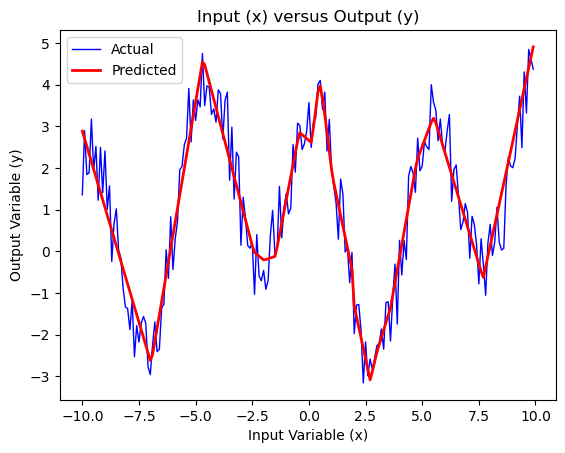

In [5]:

# report model error
print('MSE::: %.3f' % mean_squared_error(y, yhat))
print('Root MSE::: %.3f' % mean_squared_error(y ,yhat) **0.5)
print('MAE::: %.3f' % mean_absolute_error(y, yhat))
# plot x vs y
pyplot.plot(x, y, color='blue', linewidth=1, label='Actual')
# plot x vs yhat
pyplot.plot(x, yhat, color='red', linewidth=2, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

In [6]:
# now we change the input range and step to check
# the generality/interpolation of the model with respect to
# unseen data samples. 
xp = np.arange(-7.1, 7.1, 0.37)
yhatp = model.predict(xp)


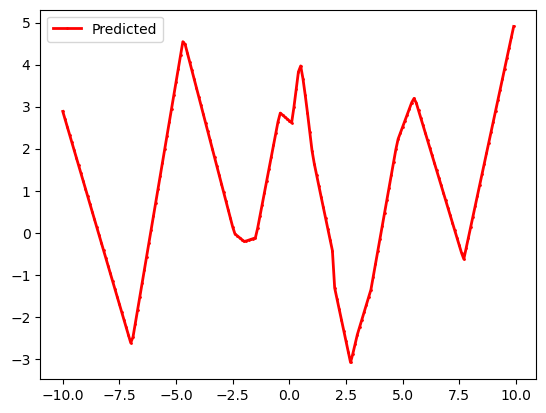

In [7]:
pyplot.plot(x, yhat, color='red', linewidth=2, label='Predicted' , marker='.' ,markersize=2)
pyplot.legend()
pyplot.show()

## Bye...